In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

## Data cleaning

In [4]:
data['Prospect ID'].duplicated().any()

False

In [5]:
data['Lead Number'].duplicated().any()

False

In [6]:
data['Do Not Email'].duplicated().any()

True

In [7]:
data.shape

(9240, 37)

In [8]:
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
(data.isnull().sum()/data.isnull().shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [10]:
# dropping columns  that have more than 40 % null values
data = data.drop(columns=["Asymmetrique Activity Index", "Asymmetrique Profile Index","Asymmetrique Activity Score", "Asymmetrique Profile Score" ])

In [11]:
(data.isnull().sum()/data.isnull().shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [12]:
print(data.shape)
data = data.dropna()
print(data.shape)

(9240, 33)
(3474, 33)


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3474 entries, 2 to 9239
Data columns (total 33 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    3474 non-null   object 
 1   Lead Number                                    3474 non-null   int64  
 2   Lead Origin                                    3474 non-null   object 
 3   Lead Source                                    3474 non-null   object 
 4   Do Not Email                                   3474 non-null   object 
 5   Do Not Call                                    3474 non-null   object 
 6   Converted                                      3474 non-null   int64  
 7   TotalVisits                                    3474 non-null   float64
 8   Total Time Spent on Website                    3474 non-null   int64  
 9   Page Views Per Visit                           3474 non-n

In [14]:
data_objects = list(data.select_dtypes(include='object').columns)
data_objects.remove('Prospect ID')
#data_objects.remove('Lead Number')
data_objects

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [15]:
data[data_objects] = data[data_objects].astype('category')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3474 entries, 2 to 9239
Data columns (total 33 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Prospect ID                                    3474 non-null   object  
 1   Lead Number                                    3474 non-null   int64   
 2   Lead Origin                                    3474 non-null   category
 3   Lead Source                                    3474 non-null   category
 4   Do Not Email                                   3474 non-null   category
 5   Do Not Call                                    3474 non-null   category
 6   Converted                                      3474 non-null   int64   
 7   TotalVisits                                    3474 non-null   float64 
 8   Total Time Spent on Website                    3474 non-null   int64   
 9   Page Views Per Visit                          

# EDA

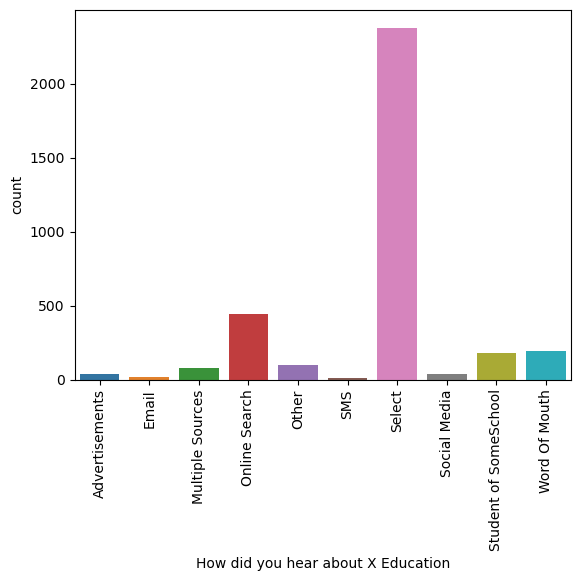

In [17]:

sns.countplot(data = data, x='How did you hear about X Education')
plt.xticks(rotation=90)
plt.show()

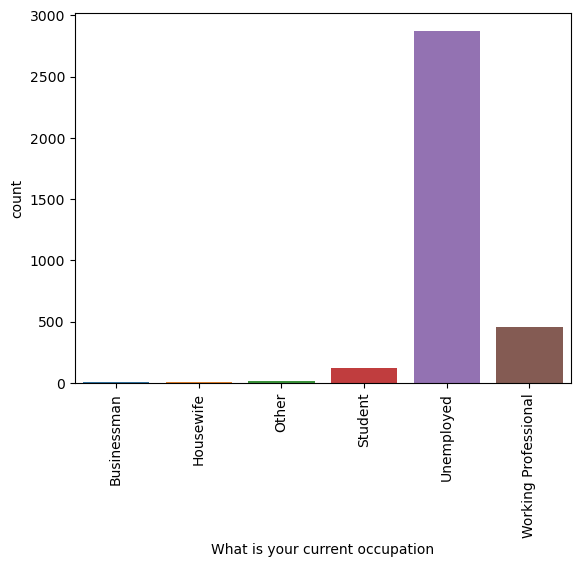

In [18]:
sns.countplot(data = data, x="What is your current occupation")
plt.xticks(rotation=90)
plt.show()

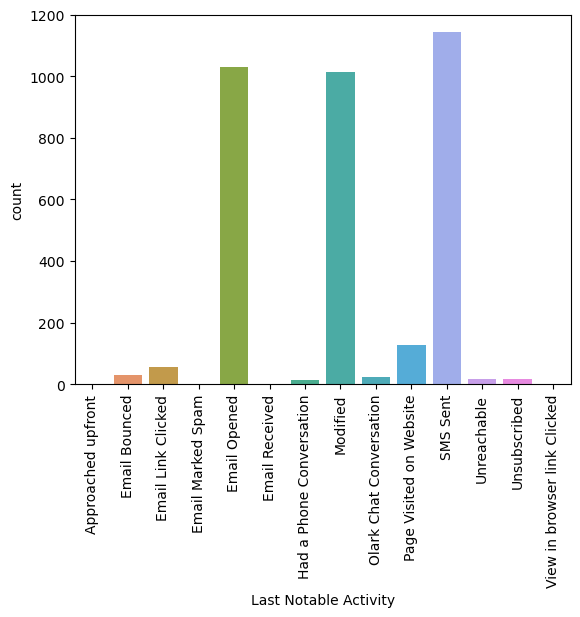

In [19]:
sns.countplot(data = data, x="Last Notable Activity")
plt.xticks(rotation=90)
plt.show()

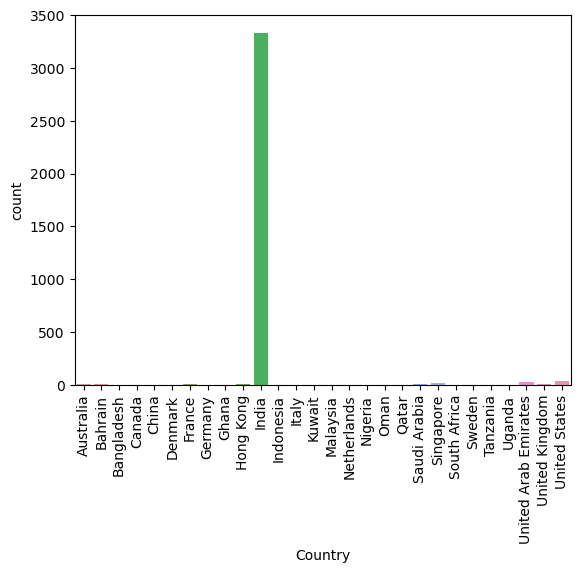

In [20]:
sns.countplot(data = data, x="Country")
plt.xticks(rotation=90)
plt.show()

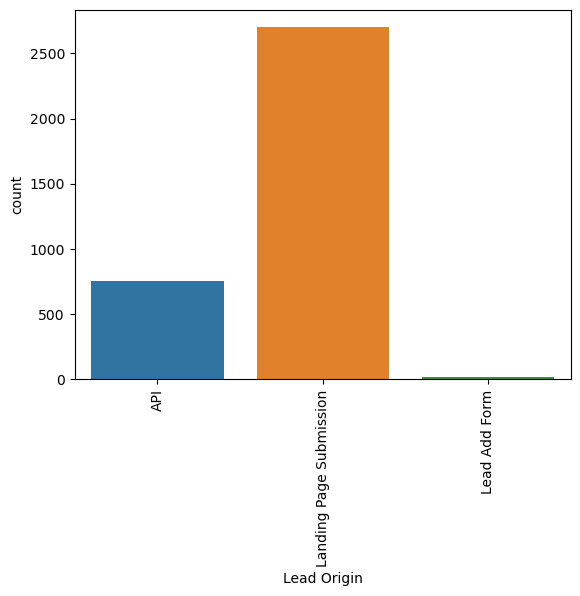

In [21]:
sns.countplot(data = data, x="Lead Origin")
plt.xticks(rotation=90)
plt.show()

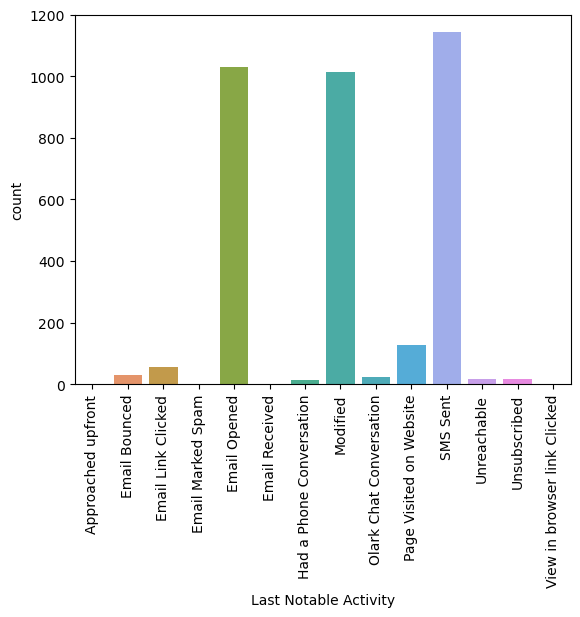

In [22]:
sns.countplot(data = data, x="Last Notable Activity")
plt.xticks(rotation=90)
plt.show()

# Preparing data for analysis

In [23]:
data_objects_df = pd.get_dummies(data,columns=data_objects,drop_first=True,dtype='int')

In [24]:
data_objects_df

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.00,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.00,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.00,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,1,2.0,1640,2.00,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
10,2a369e35-ca95-4ca9-9e4f-9d27175aa320,660608,1,8.0,1351,8.00,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,c0b25922-511f-4c56-852e-ced210a45447,579615,1,5.0,210,2.50,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,1,8.0,1845,2.67,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,0,2.0,238,2.00,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,0,2.0,199,2.00,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [25]:
data_objects_df.shape

(3474, 154)

In [26]:
data_objects_df.drop_duplicates(subset=["Prospect ID","Lead Number"],inplace=True)

In [27]:
data_objects_df.shape

(3474, 154)

In [28]:
data1 = data_objects_df.drop(columns=["Prospect ID","Lead Number"])

In [29]:
data1.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,1,2.0,1532,2.0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6,1,2.0,1640,2.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
10,1,8.0,1351,8.0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [30]:
data1

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,1,2.0,1532,2.00,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6,1,2.0,1640,2.00,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
10,1,8.0,1351,8.00,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,1,5.0,210,2.50,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Test train split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
y = data1.pop('Converted')
X = data1

In [33]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Press_Release,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,2.0,1532,2.0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,2.0,1640,2.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
10,8.0,1351,8.0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [34]:
y.head()

2     1
3     0
4     1
6     1
10    1
Name: Converted, dtype: int64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()    #Instantiating the object
cols = X_train.columns
X_train[cols] = scaler.fit_transform(X_train[cols])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Press_Release,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1816,0.003984,0.093209,0.0625,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
620,0.011952,0.023080,0.1875,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6095,0.015936,0.789614,0.2500,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6569,0.007968,0.017754,0.1250,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2835,0.011952,0.672881,0.1875,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


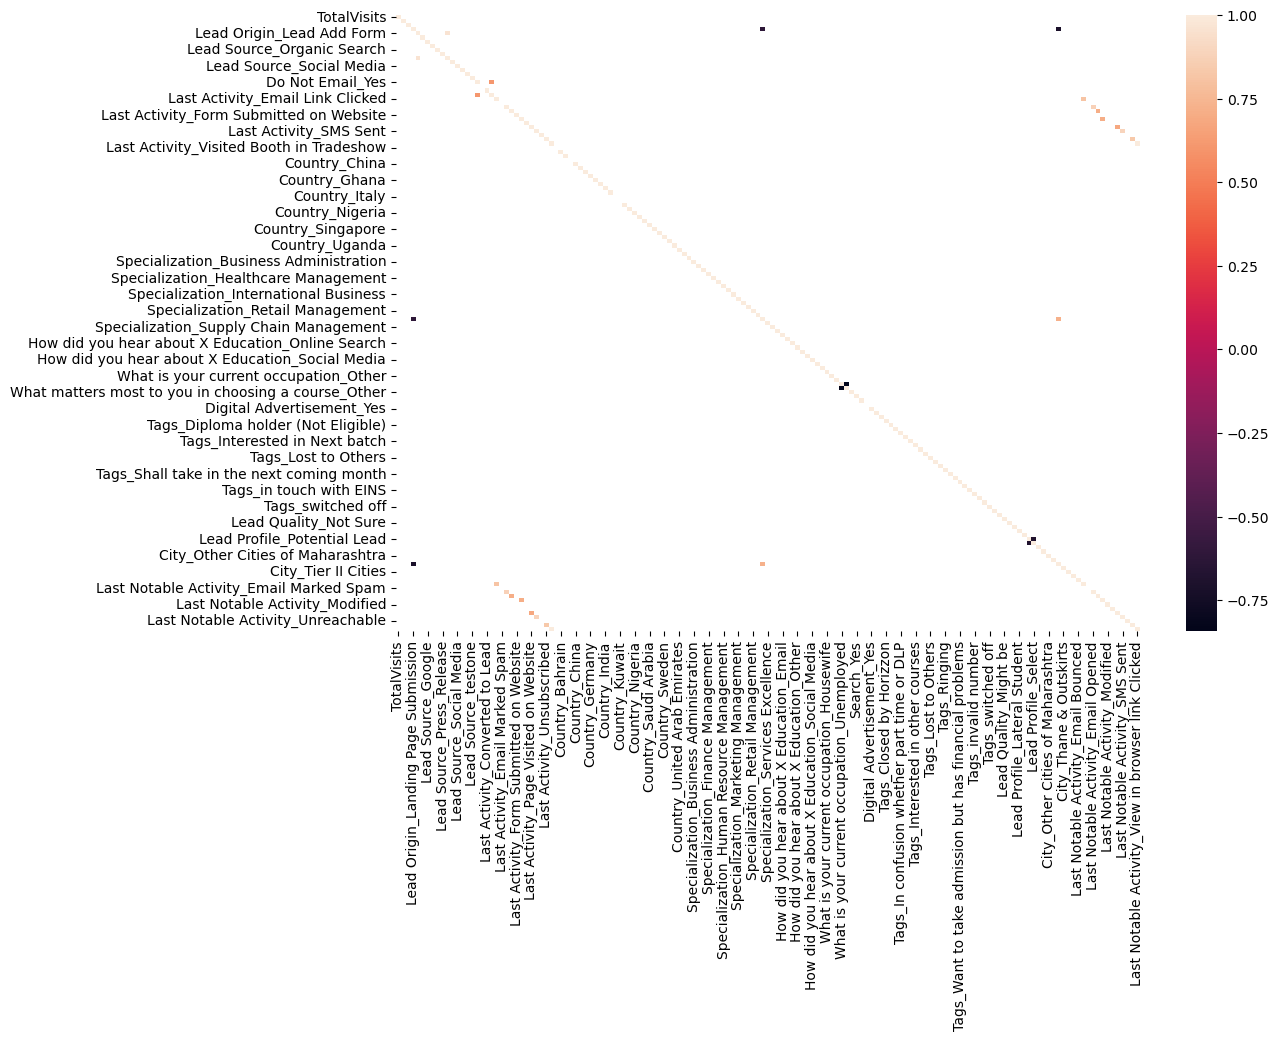

In [37]:
# Checking for Correlations
##We are emphasizing on correlation only in the range of more than equal to 0.6 and less than equal to (-0.6)
corr = X_train.corr()
corr1 = corr[abs(corr)>=.6]
plt.figure(figsize=(12,8))
sns.heatmap(corr1)
plt.show()

# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [39]:
from sklearn.feature_selection import RFE

In [40]:
# Running RFE with 15 variables as output
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [41]:
# Features selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 57),
 ('Lead Origin_Landing Page Submission', False, 97),
 ('Lead Origin_Lead Add Form', False, 21),
 ('Lead Source_Facebook', False, 48),
 ('Lead Source_Google', False, 79),
 ('Lead Source_Olark Chat', False, 54),
 ('Lead Source_Organic Search', False, 61),
 ('Lead Source_Press_Release', False, 128),
 ('Lead Source_Reference', False, 27),
 ('Lead Source_Referral Sites', False, 60),
 ('Lead Source_Social Media', False, 105),
 ('Lead Source_WeLearn', False, 116),
 ('Lead Source_Welingak Website', False, 100),
 ('Lead Source_testone', False, 107),
 ('Do Not Email_Yes', False, 3),
 ('Do Not Call_Yes', False, 132),
 ('Last Activity_Converted to Lead', False, 127),
 ('Last Activity_Email Bounced', False, 39),
 ('Last Activity_Email Link Clicked', False, 81),
 ('Last Activity_Email Marked Spam', False, 131),
 ('Last Activity_Email Opened', False, 68),
 ('Last Activity_Email Received', False

In [42]:
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Last Activity_SMS Sent',
       'Country_Germany', 'How did you hear about X Education_SMS',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_in touch with EINS', 'Tags_invalid number', 'Tags_switched off',
       'Lead Quality_Worst', 'Lead Profile_Lateral Student'],
      dtype='object')

All the variables selected by RFE, next statistics part (p-values and the VIFs).

In [43]:
# As a first filter to reduce feature we use all the features recomended by RFE
X_train = X_train[col]

In [44]:
import statsmodels.api as sm

In [45]:
# Checking all the logistic regresiion fit and examining the p-values
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2431
Model:                            GLM   Df Residuals:                     2415
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -299.20
Date:                Sun, 21 Apr 2024   Deviance:                       598.40
Time:                        16:00:25   Pearson chi2:                 2.14e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6793
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.5793      0.366    -12.510      0.000      -5.297      -3.862
TotalVisits                                  7.9500      4.124      1.928      0.054      -0.132      16.032
Total Time Spent on Website                  4.6620      0.488      9.549      0.000       3.705       5.619
Last Activity_SMS Sent                       1.1820      0.251      4.710      0.000       0.690       1.674
Country_Germany                             27.9512   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
How did you hear about X Education_SMS       3.1248      1.384      2.257      0.024       0.411       5.838
Tags_Busy                                    2.5590      0.357      7.161      0.000       1.859       3.259
Tags_Closed by Horizzon                      7.2375      1.054      6.865      0.000       5.171       9.304
Tags_Lost to EINS                            7.6725      1.212      6.330      0.000       5.297      10.048
Tags_Ringing                                -1.1977      0.404     -2.964      0.003      -1.990      -0.406
Tags_Will revert after reading the email     6.0272      0.340     17.712      0.000       5.360       6.694
Tags_in touch with EINS                      4.1849      1.325      3.159      0.002       1.588       6.782
Tags_invalid number                        -20.2734   1.39e+04     -0.001      0.999   -2.73e+04    2.73e+04
Tags_switched off                           -2.4705      1.059     -2.333      0.020      -4.546      -0.395
Lead Quality_Worst                          -2.9134      0.877     -3.321      0.001      -4.633      -1.194
Lead Profile_Lateral Student                24.9224    2.3e+04      0.001      0.999    -4.5e+04    4.51e+04
============================================================================================================
"""

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
# Calulating the VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,3.21
9,Tags_Will revert after reading the email,3.15
2,Last Activity_SMS Sent,1.87
0,TotalVisits,1.47
8,Tags_Ringing,1.37
5,Tags_Busy,1.20
6,Tags_Closed by Horizzon,1.18
13,Lead Quality_Worst,1.12
12,Tags_switched off,1.10
7,Tags_Lost to EINS,1.06


Even after reducing the number of features using RFE a new level of filtering is required to make the model more robust. for which a manul appraoch is executed in further steps to make the model more accurate

In [48]:
# droppping one of the variable with the highest p-values
X_train.drop('Country_Germany', axis = 1, inplace = True)

In [49]:
# Fit the model again with new features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2431
Model:                            GLM   Df Residuals:                     2416
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -303.19
Date:                Sun, 21 Apr 2024   Deviance:                       606.38
Time:                        16:00:25   Pearson chi2:                 2.14e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6782
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.5713      0.365    -12.514      0.000      -5.287      -3.855
TotalVisits                                  8.1788      4.331      1.888      0.059      -0.310      16.668
Total Time Spent on Website                  4.6613      0.484      9.624      0.000       3.712       5.611
Last Activity_SMS Sent                       1.1434      0.248      4.605      0.000       0.657       1.630
How did you hear about X Education_SMS       3.1230      1.380      2.263      0.024       0.419       5.827
Tags_Busy                                    2.5702      0.357      7.198      0.000       1.870       3.270
Tags_Closed by Horizzon                      7.2269      1.054      6.856      0.000       5.161       9.293
Tags_Lost to EINS                            7.6666      1.212      6.325      0.000       5.291      10.042
Tags_Ringing                                -1.1815      0.404     -2.928      0.003      -1.972      -0.391
Tags_Will revert after reading the email     6.0253      0.340     17.732      0.000       5.359       6.691
Tags_in touch with EINS                      4.1858      1.323      3.164      0.002       1.592       6.779
Tags_invalid number                        -20.2557   1.39e+04     -0.001      0.999   -2.73e+04    2.73e+04
Tags_switched off                           -1.7352      0.785     -2.210      0.027      -3.274      -0.196
Lead Quality_Worst                          -2.9227      0.877     -3.332      0.001      -4.642      -1.204
Lead Profile_Lateral Student                24.9114    2.3e+04      0.001      0.999    -4.5e+04    4.51e+04
============================================================================================================
"""

In [50]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,3.20
8,Tags_Will revert after reading the email,3.15
2,Last Activity_SMS Sent,1.87
0,TotalVisits,1.47
7,Tags_Ringing,1.37
4,Tags_Busy,1.20
5,Tags_Closed by Horizzon,1.18
12,Lead Quality_Worst,1.12
11,Tags_switched off,1.09
6,Tags_Lost to EINS,1.06


In [51]:
X_train.drop('Lead Profile_Lateral Student', axis = 1, inplace = True)

In [52]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2431
Model:                            GLM   Df Residuals:                     2417
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -307.07
Date:                Sun, 21 Apr 2024   Deviance:                       614.14
Time:                        16:00:25   Pearson chi2:                 2.14e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6772
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.4667      0.356    -12.553      0.000      -5.164      -3.769
TotalVisits                                  8.0326      4.287      1.874      0.061      -0.370      16.435
Total Time Spent on Website                  4.5962      0.479      9.594      0.000       3.657       5.535
Last Activity_SMS Sent                       1.1202      0.246      4.548      0.000       0.638       1.603
How did you hear about X Education_SMS       3.0803      1.368      2.252      0.024       0.399       5.762
Tags_Busy                                    2.5002      0.351      7.121      0.000       1.812       3.188
Tags_Closed by Horizzon                      7.1483      1.051      6.800      0.000       5.088       9.209
Tags_Lost to EINS                            7.6041      1.214      6.263      0.000       5.225       9.984
Tags_Ringing                                -1.2355      0.399     -3.095      0.002      -2.018      -0.453
Tags_Will revert after reading the email     5.9472      0.333     17.870      0.000       5.295       6.599
Tags_in touch with EINS                      4.0982      1.319      3.107      0.002       1.513       6.684
Tags_invalid number                        -20.3163   1.39e+04     -0.001      0.999   -2.74e+04    2.73e+04
Tags_switched off                           -1.7907      0.782     -2.289      0.022      -3.324      -0.257
Lead Quality_Worst                          -2.9697      0.869     -3.416      0.001      -4.674      -1.266
============================================================================================================
"""

In [53]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,3.20
8,Tags_Will revert after reading the email,3.15
2,Last Activity_SMS Sent,1.86
0,TotalVisits,1.47
7,Tags_Ringing,1.37
4,Tags_Busy,1.20
5,Tags_Closed by Horizzon,1.18
12,Lead Quality_Worst,1.12
11,Tags_switched off,1.09
6,Tags_Lost to EINS,1.06


In [54]:
X_train.drop('Tags_invalid number', axis = 1, inplace = True)

In [55]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2431
Model:                            GLM   Df Residuals:                     2418
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -308.14
Date:                Sun, 21 Apr 2024   Deviance:                       616.27
Time:                        16:00:25   Pearson chi2:                 2.15e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6769
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.5305      0.355    -12.751      0.000      -5.227      -3.834
TotalVisits                                  8.0676      4.260      1.894      0.058      -0.282      16.417
Total Time Spent on Website                  4.6185      0.478      9.652      0.000       3.681       5.556
Last Activity_SMS Sent                       1.0959      0.245      4.481      0.000       0.617       1.575
How did you hear about X Education_SMS       3.1062      1.371      2.265      0.024       0.418       5.794
Tags_Busy                                    2.5718      0.349      7.370      0.000       1.888       3.256
Tags_Closed by Horizzon                      7.2070      1.051      6.856      0.000       5.147       9.267
Tags_Lost to EINS                            7.6497      1.212      6.312      0.000       5.274      10.025
Tags_Ringing                                -1.1656      0.397     -2.938      0.003      -1.943      -0.388
Tags_Will revert after reading the email     6.0114      0.332     18.118      0.000       5.361       6.662
Tags_in touch with EINS                      4.1668      1.318      3.161      0.002       1.583       6.751
Tags_switched off                           -1.7229      0.781     -2.205      0.027      -3.254      -0.191
Lead Quality_Worst                          -2.9438      0.874     -3.369      0.001      -4.656      -1.231
============================================================================================================
"""

In [56]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,3.20
8,Tags_Will revert after reading the email,3.14
2,Last Activity_SMS Sent,1.85
0,TotalVisits,1.47
7,Tags_Ringing,1.36
4,Tags_Busy,1.20
5,Tags_Closed by Horizzon,1.18
11,Lead Quality_Worst,1.12
10,Tags_switched off,1.09
6,Tags_Lost to EINS,1.06


In [57]:
X_train_sm.columns

Index(['const', 'TotalVisits', 'Total Time Spent on Website',
       'Last Activity_SMS Sent', 'How did you hear about X Education_SMS',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_in touch with EINS', 'Tags_switched off', 'Lead Quality_Worst'],
      dtype='object')

# Prediction

In [58]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1816    0.005307
620     0.013029
6095    0.998988
6569    0.006619
2835    0.996924
7635    0.001187
4595    0.170920
8202    0.003277
4523    0.996685
5456    0.891111
dtype: float64

In [59]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00530662, 0.01302877, 0.99898777, 0.00661897, 0.99692393,
       0.00118719, 0.17092011, 0.00327726, 0.99668451, 0.89111095])

In [60]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.005307
1,0,0.013029
2,1,0.998988
3,0,0.006619
4,1,0.996924


In [61]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.005307,0
1,0,0.013029,0
2,1,0.998988,1
3,0,0.006619,0
4,1,0.996924,1


# Model Validataion

In [62]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [63]:
# confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1101,   49],
       [  50, 1231]], dtype=int64)

True positives (TP) = 1321
True Negative (TN) = 1101
False positive (FP) = 
False negatives (FN)

In [64]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9592760180995475

In [65]:
TP = confusion[1,1]
print(f"True positive = {TP}")

TN = confusion[0,0]
print(f"True Negative = {TN}")

FP = confusion[0,1]
print(f"False positive = {FP}")

FN = confusion[1,0]
print(f"False Negative = {FN}")

True positive = 1231
True Negative = 1101
False positive = 49
False Negative = 50


In [66]:
# Calculating the sensitivity
TP/(TP+FN)

0.960967993754879

In [67]:
# Calculating the specificity
TN/(TN+FP)

0.957391304347826

# ROC curve

In [68]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [69]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )


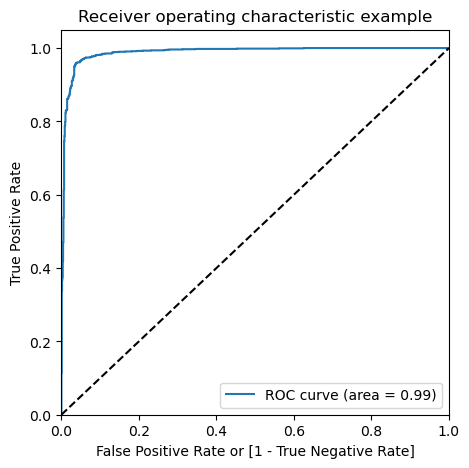

In [70]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [71]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.005307,0,1,0,0,0,0,0,0,0,0,0
1,0,0.013029,0,1,0,0,0,0,0,0,0,0,0
2,1,0.998988,1,1,1,1,1,1,1,1,1,1,1
3,0,0.006619,0,1,0,0,0,0,0,0,0,0,0
4,1,0.996924,1,1,1,1,1,1,1,1,1,1,1


In [72]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensitivity,specificity
0.0,0.0,0.526944,1.000000,0.000000
0.1,0.1,0.930481,0.988290,0.866087
0.2,0.2,0.948169,0.978923,0.913913
0.3,0.3,0.956397,0.973458,0.937391
0.4,0.4,0.958453,0.967213,0.948696
0.5,0.5,0.959276,0.960968,0.957391
0.6,0.6,0.959687,0.956284,0.963478
0.7,0.7,0.957631,0.950039,0.966087
0.8,0.8,0.951872,0.938329,0.966957
0.9,0.9,0.923900,0.874317,0.979130


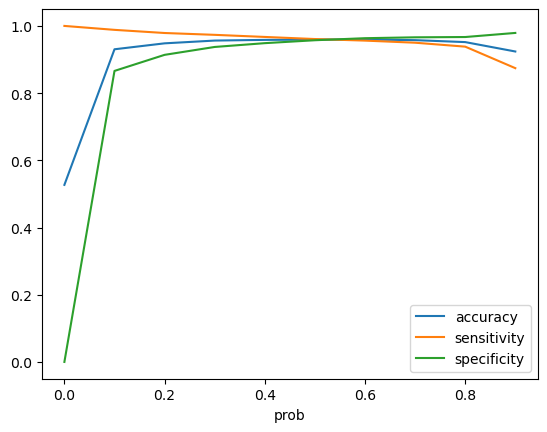

In [73]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

In [74]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.005307,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.013029,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.998988,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.006619,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.996924,1,1,1,1,1,1,1,1,1,1,1,1


In [75]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9572192513368984

In [76]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2


array([[1084,   66],
       [  38, 1243]], dtype=int64)

In [77]:
TP = confusion2[1,1]
print(f"True positive = {TP}")

TN = confusion2[0,0]
print(f"True Negative = {TN}")

FP = confusion2[0,1]
print(f"False positive = {FP}")

FN = confusion2[1,0]
print(f"False Negative = {FN}")

True positive = 1243
True Negative = 1084
False positive = 66
False Negative = 38


In [78]:
# Calculating the sensitivity
TP/(TP+FN)


0.970335675253708

In [79]:
# Calculating the specificity
TN/(TN+FP)

0.9426086956521739

# Prediction on Test set

In [80]:
# Scaling numeric values
X_test[cols] = scaler.transform(X_test[cols])

In [81]:
col = X_train.columns

In [82]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Last Activity_SMS Sent,How did you hear about X Education_SMS,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_switched off,Lead Quality_Worst
1779,1.0,0.023904,0.043941,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,1.0,0.023904,0.583666,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4278,1.0,0.007968,0.201509,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3080,1.0,0.039841,0.232579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
942,1.0,0.027888,0.652907,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1.0,0.007968,0.475366,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
117,1.0,0.007968,0.340435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2940,1.0,0.007968,0.590768,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5525,1.0,0.075697,0.611185,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [83]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.173228
1,1,0.987500
2,1,0.922434
3,0,0.041690
4,1,0.997314


In [84]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,1,0.173228,0
1,1,0.987500,1
2,1,0.922434,1
3,0,0.041690,0
4,1,0.997314,1
...,...,...,...
1038,1,0.995408,1
1039,0,0.002907,0
1040,1,0.995366,1
1041,1,0.992713,1


In [85]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.9568552253116012

In [86]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[471,  22],
       [ 23, 527]], dtype=int64)

In [87]:
TP = confusion2[1,1]
print(f"True positive = {TP}")

TN = confusion2[0,0]
print(f"True Negative = {TN}")

FP = confusion2[0,1]
print(f"False positive = {FP}")

FN = confusion2[1,0]
print(f"False Negative = {FN}")

True positive = 527
True Negative = 471
False positive = 22
False Negative = 23


In [88]:
# Calculating the sensitivity
TP/(TP+FN)

0.9581818181818181

In [89]:
# Calculating the specificity
TN/(TN+FP)

0.9553752535496958

# Precision Recall

In [90]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1101,   49],
       [  50, 1231]], dtype=int64)

In [91]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.96171875

- Precision measures the proportion of positive identifications made by the model that were actually correct. It focuses on minimizing false positives.
- 96.17 % of positive conversion were correctly predicted by the model

In [92]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.960967993754879

-  Recall (or sensitivity) measures the proportion of actual positive cases that were correctly identified by the model. It focuses on minimizing false negative
- 96.1 %

# Precision Recall tradeoff

Precision and recall are both metrics used to evaluate the performance of classification models, but they focus on different aspects of the model's predictions.

1. **Precision**:
   - Precision measures the proportion of positive identifications made by the model that were actually correct.
   - It is calculated as the ratio of true positives to the sum of true positives and false positives.
   - Precision focuses on minimizing false positives.
   - A high precision indicates that when the model predicts a positive result, it is likely to be correct.

2. **Recall**:
   - Recall (also known as sensitivity) measures the proportion of actual positive cases that were correctly identified by the model.
   - It is calculated as the ratio of true positives to the sum of true positives and false negatives.
   - Recall focuses on minimizing false negatives.
   - A high recall indicates that the model is good at capturing positive cases, even if it means accepting more false positives.

In summary:
- Precision measures the accuracy of positive predictions, focusing on minimizing false positives.
- Recall measures the coverage of positive cases, focusing on minimizing false negatives.

Both precision and recall are important metrics, and the choice between them depends on the specific goals and requirements of the classification task. In some scenarios, precision may be more critical (e.g., medical diagnostics), while in others, recall may be more important (e.g., search engine result retrieval). Additionally, there is often a trade-off between precision and recall, where improving one may come at the expense of the other, as seen in the precision-recall tradeoff.

In [93]:
from sklearn.metrics import precision_recall_curve

In [94]:
y_train_pred_final.Converted, y_train_pred_final.Predicted


(0       0
 1       0
 2       1
 3       0
 4       1
        ..
 2426    1
 2427    1
 2428    0
 2429    1
 2430    1
 Name: Converted, Length: 2431, dtype: int64,
 0       0
 1       0
 2       1
 3       0
 4       1
        ..
 2426    1
 2427    1
 2428    0
 2429    1
 2430    1
 Name: Predicted, Length: 2431, dtype: int64)

In [95]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)


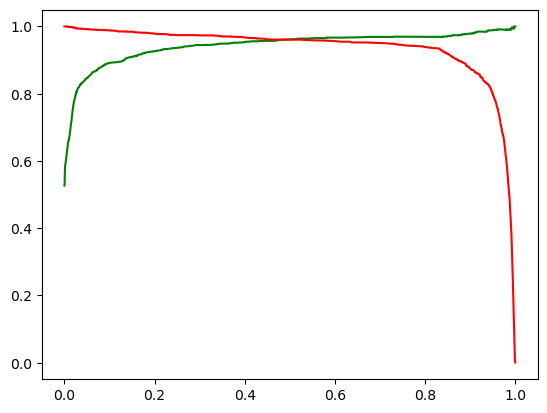

In [96]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [97]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.005307,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.013029,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.998988,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.006619,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.996924,1,1,1,1,1,1,1,1,1,1,1,1


In [98]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.958041958041958

In [99]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1092,   58],
       [  44, 1237]], dtype=int64)

In [100]:
TP = confusion2[1,1]
print(f"True positive = {TP}")

TN = confusion2[0,0]
print(f"True Negative = {TN}")

FP = confusion2[0,1]
print(f"False positive = {FP}")

FN = confusion2[1,0]
print(f"False Negative = {FN}")

True positive = 1237
True Negative = 1092
False positive = 58
False Negative = 44


In [101]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.9552123552123553

In [102]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.9656518345042935

# Final prediction

In [103]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.173228
1,1,0.987500
2,1,0.922434
3,0,0.041690
4,1,0.997314


In [104]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,1,0.173228,0
1,1,0.987500,1
2,1,0.922434,1
3,0,0.041690,0
4,1,0.997314,1
...,...,...,...
1038,1,0.995408,1
1039,0,0.002907,0
1040,1,0.995366,1
1041,1,0.992713,1


In [105]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.9606903163950143

- Accuracy measures the overall correctness of the classification model across all classes. It is the ratio of correctly predicted instances (both true positives and true negatives) to the total number of instances
- in this case 96.1% of the instances were correctly classified by the model

In [106]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[475,  18],
       [ 23, 527]], dtype=int64)

In [107]:
TP = confusion2[1,1]
print(f"True positive = {TP}")

TN = confusion2[0,0]
print(f"True Negative = {TN}")

FP = confusion2[0,1]
print(f"False positive = {FP}")

FN = confusion2[1,0]
print(f"False Negative = {FN}")

True positive = 527
True Negative = 475
False positive = 18
False Negative = 23


In [108]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.9669724770642202

-  precision is for evaluating the performance of classification models, especially in scenarios where avoiding false alarms (false positives) is more important than identifying all positive cases.
- A precision value of approximately 0.967 means that 96.7% of the positive identifications made by the classification model were actually correct.

In [109]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.9581818181818181

- Recall is for evaluating the performance of classification models, especially in scenarios where detecting positive cases is more important than avoiding false alarms.
- A recall value of 0.9581 signifies that 95.8% of the actual positive cases were correctly identified by the classification model.